# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [119]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  silhouette_score
# Loading and examining the dataset
#penguins_df = pd.read_csv("data/penguins.csv")

In [120]:
def wrangle(filepath):
    penguins_clean = pd.read_csv(filepath)
    # removing null values
    penguins_clean = penguins_df.dropna()
    penguins_clean[penguins_clean['flipper_length_mm']>4000]
    penguins_clean[penguins_clean['flipper_length_mm']<0]
    penguins_clean = penguins_clean.drop([9,14])
    return penguins_clean

In [121]:
df = wrangle('data/penguins.csv')
penguins_clean = df.copy()
dummy_df = pd.get_dummies(df).drop('sex_.',axis=1)
penguins_preprocessed = pd.DataFrame(StandardScaler().fit_transform(dummy_df)
                         ,columns=dummy_df.columns)
penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001


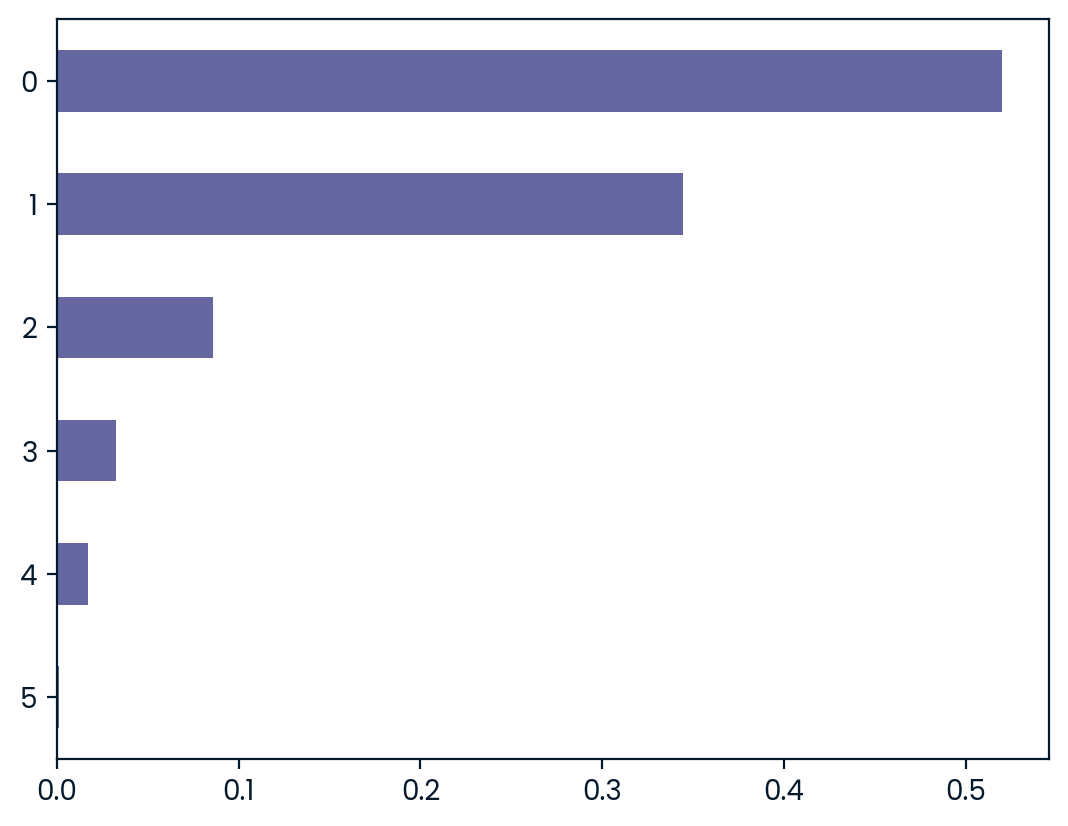

In [122]:
pca = PCA()
pca.fit_transform(penguins_preprocessed)
explained_variance_ratios = pd.Series(pca.explained_variance_ratio_)
explained_variance_ratios.sort_values(ascending=True).plot(kind='barh');

In [123]:
n_components = 2
pca = PCA(n_components=n_components)
penguins_pca = pd.DataFrame(pca.fit_transform(penguins_preprocessed),
                           columns=['PC1','PC2'])
penguins_pca.head()

,PC1,PC2
0,-0.729521,-2.097192
1,-1.929304,0.412150
2,-1.953525,0.308485
3,-2.288178,-0.158278
4,-0.621822,-2.514020


In [124]:
inertia = []
silhouette_scores = []
for k in range(2,12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit_transform(penguins_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(penguins_pca,kmeans.labels_))
    
# making series of inertia and silhouette_score    
inertia = pd.Series(inertia,index=range(2,12))
silhouette_scores = pd.Series(silhouette_scores,index=range(2,12))

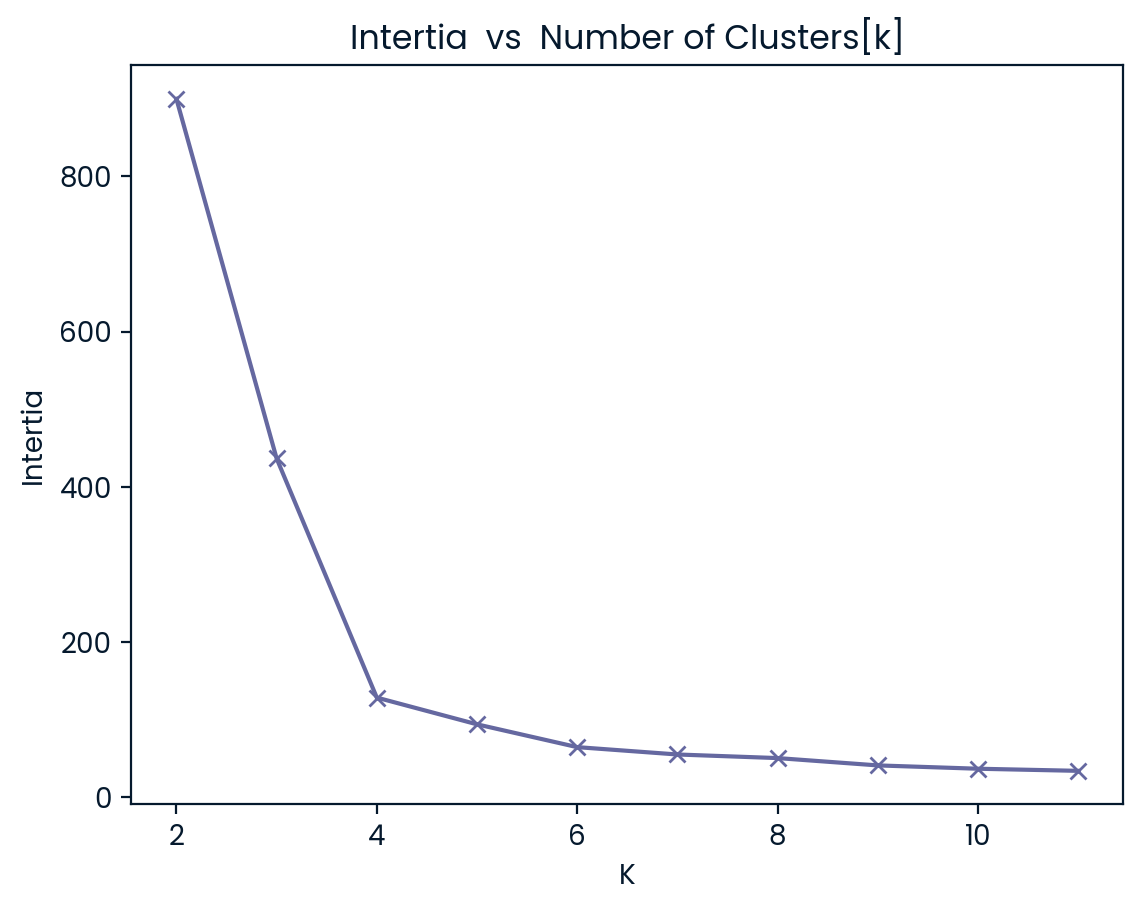

In [125]:
inertia.plot(marker='x')
plt.xlabel('K')
plt.ylabel('Intertia')
plt.title('Intertia  vs  Number of Clusters[k]');

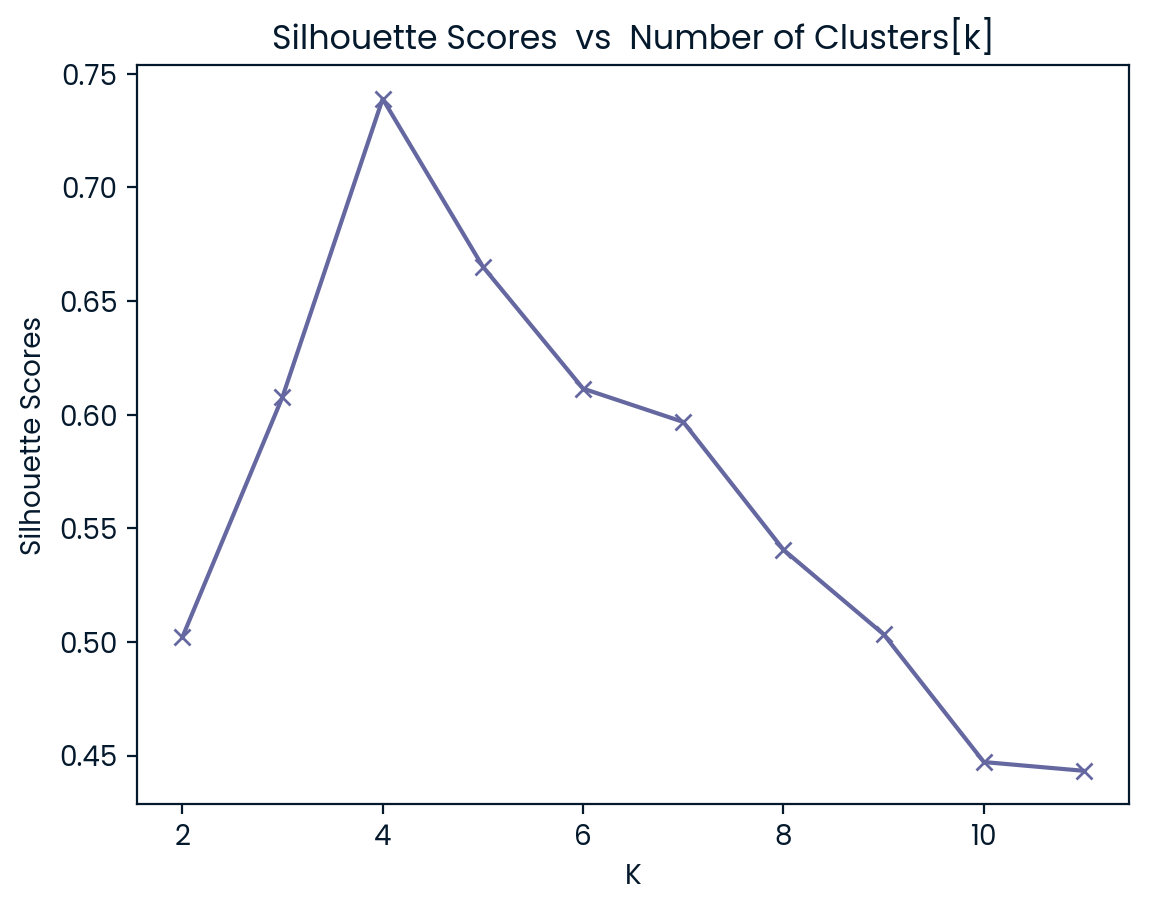

In [126]:
silhouette_scores.plot(marker='x')
plt.xlabel('K')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores  vs  Number of Clusters[k]');

In [127]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters,random_state=42)
kmeans.fit_transform(penguins_pca)
penguins_clean['label'] = kmeans.labels_

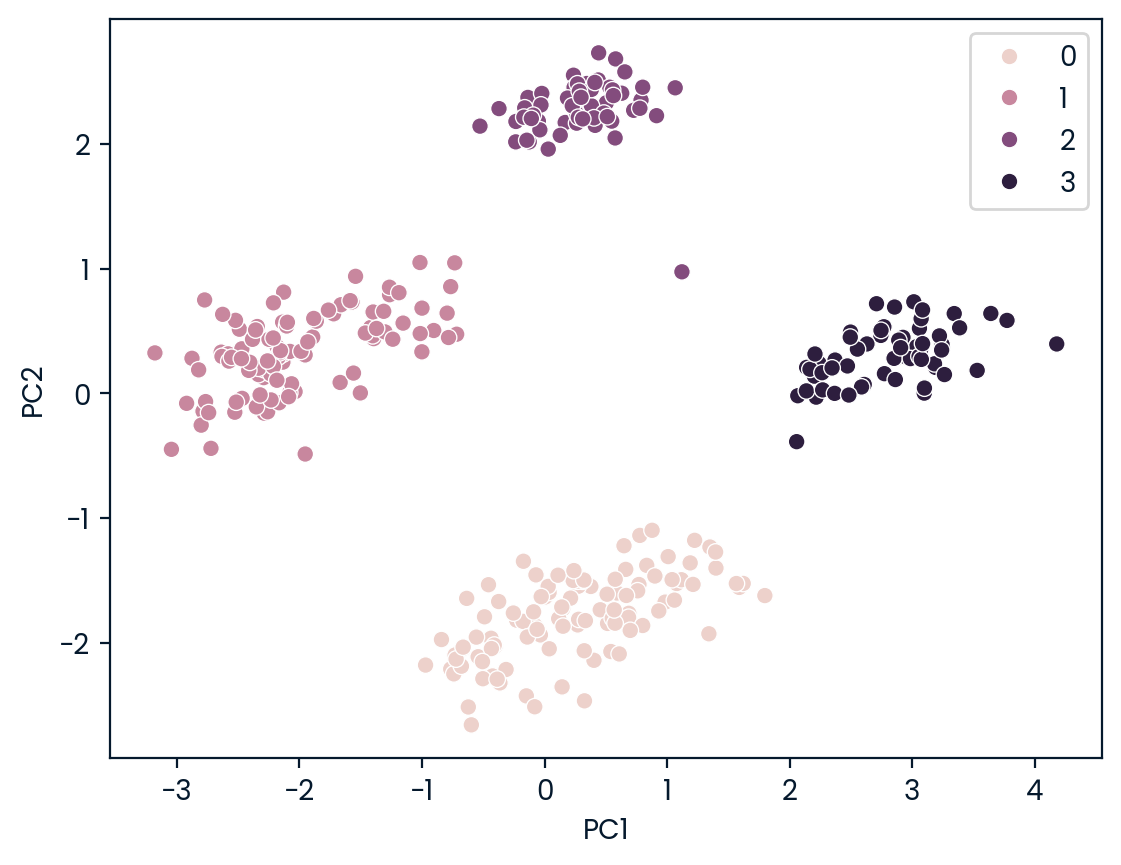

In [128]:
sns.scatterplot(data=penguins_pca,x='PC1',y='PC2',hue=kmeans.labels_);

In [129]:
stat_penguins = penguins_clean.groupby('label').aggregate('mean')
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,40.217757,17.611215,189.046729,3419.158879
2,45.545763,14.262712,212.779661,4683.050847
3,49.473770,15.718033,221.540984,5484.836066
